<a href="https://colab.research.google.com/github/Park-hanna/BDA_study/blob/main/Forecasting/Fake_and_Real_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup

import re,string,unicodedata

from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau

import tensorflow as tf

# Importing the dataset

In [ ]:
true = pd.read_csv('/content/drive/MyDrive/Data/Fake and Real News/True.csv')
false = pd.read_csv('/content/drive/MyDrive/Data/Fake and Real News/Fake.csv')

# Data visualization and preprocessing

In [ ]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [ ]:
false.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [ ]:
true['category'] = 1
false['category'] = 0

In [ ]:
df = pd.concat([true, false])

In [ ]:
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
23476  21st Century Wire says As 21WIRE reported earl...   Middle-east   
23477  21st Century Wire says It s a familiar theme. ...   Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
23479  21st Century Wire says Al Jazeera America will...   Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date  category  
0      December 31, 2017          1  
1      December 29, 2017          1  
2      December 31, 2017          1  
3      December 30, 2017          1  
4      December 29, 2017          1  
...                   ...       ...  
23476    January 16, 2016         0  
23477    January 16, 2016         0  
23478    January 15, 2016         0  
23479    January 14, 2016         0  
23480    January 12, 2016         0  

[44898 rows x 5 columns]

In [ ]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  category  
0  December 31, 2017          1  
1  December 29, 2017          1  
2  December 31, 2017          1  
3  December 30, 2017          1  
4  December 29, 2017          1

In [ ]:
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [ ]:
df.title.count()

44898

In [ ]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(1, 0, 'worldnews'),
 Text(2, 0, 'News'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Government News'),
 Text(5, 0, 'left-news'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Middle-east')]

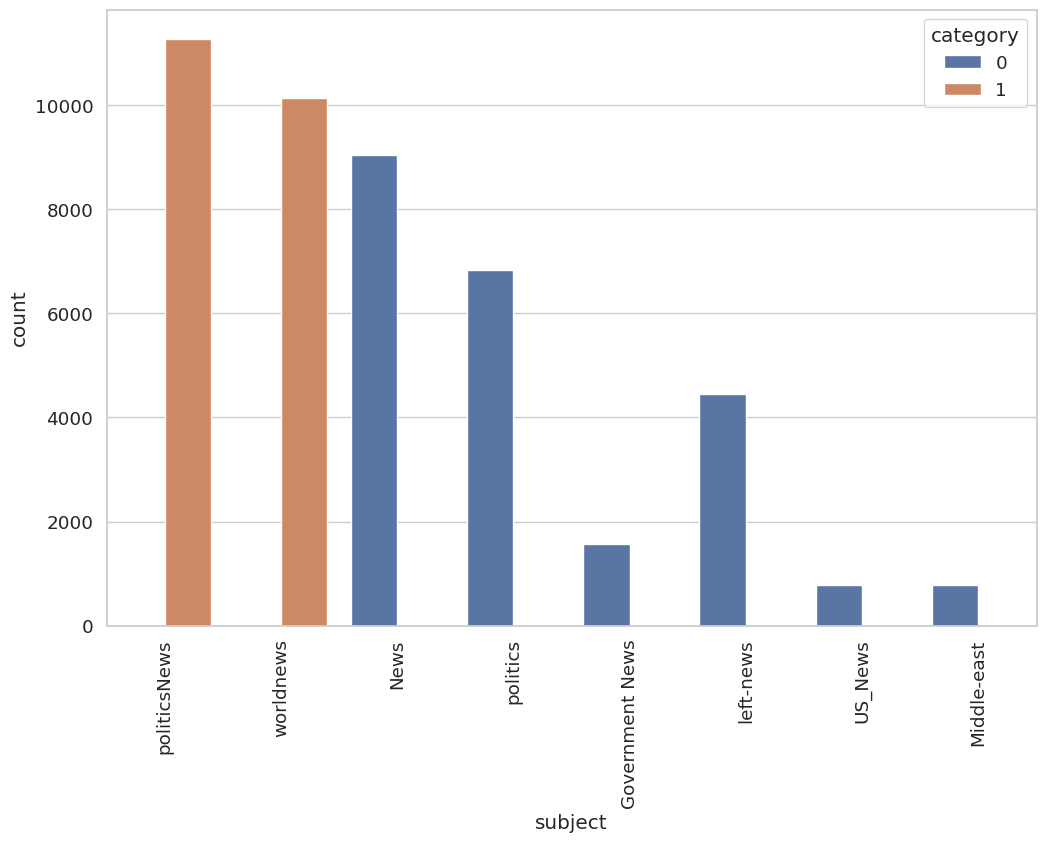

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = 'whitegrid', font_scale = 1.2)
chart = sns.countplot(x = 'subject', hue = 'category', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)

since the topics in subject columns are different for both categories, hence we have to exclude it from final text column

In [ ]:
df['text'] = df['text'] + " "+ df['title']
del df['title']
del df['subject']
del df['date']

What are STOPWORDS?
<hr>
stopwords are the englisg words which doesn't add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. ex, the words like the, he, have etc. Such words are already captured this in corpus named corpus. We first download it to out python environment

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

Data Cleaning

In [ ]:
def strip_html(text):
  soup = BeautifulSoup(text, 'html.parser')
  return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
  return re.sub('\[[^]]*\]','',text)

# Removing URL's
def remove_between_square_brackets(text):
  return re.sub(r'http\S+','',text)

# Removing the stopwords from text
def remove_stopwords(text):
  final_text = []
  for i in text.split():
    if i.strip().lower() not in stop:
      final_text.append(i.strip())

  return " ".join(final_text)

# Removing the noisy text
def denoise_text(text):
  text = strip_html(text)
  text = remove_between_square_brackets(text)
  text = remove_stopwords(text)
  return text

# Apply function on review column
df['text'] = df['text'].apply(denoise_text)

<ipython-input-16-3818f9d37816>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


wordcoluds for real text(label-1)

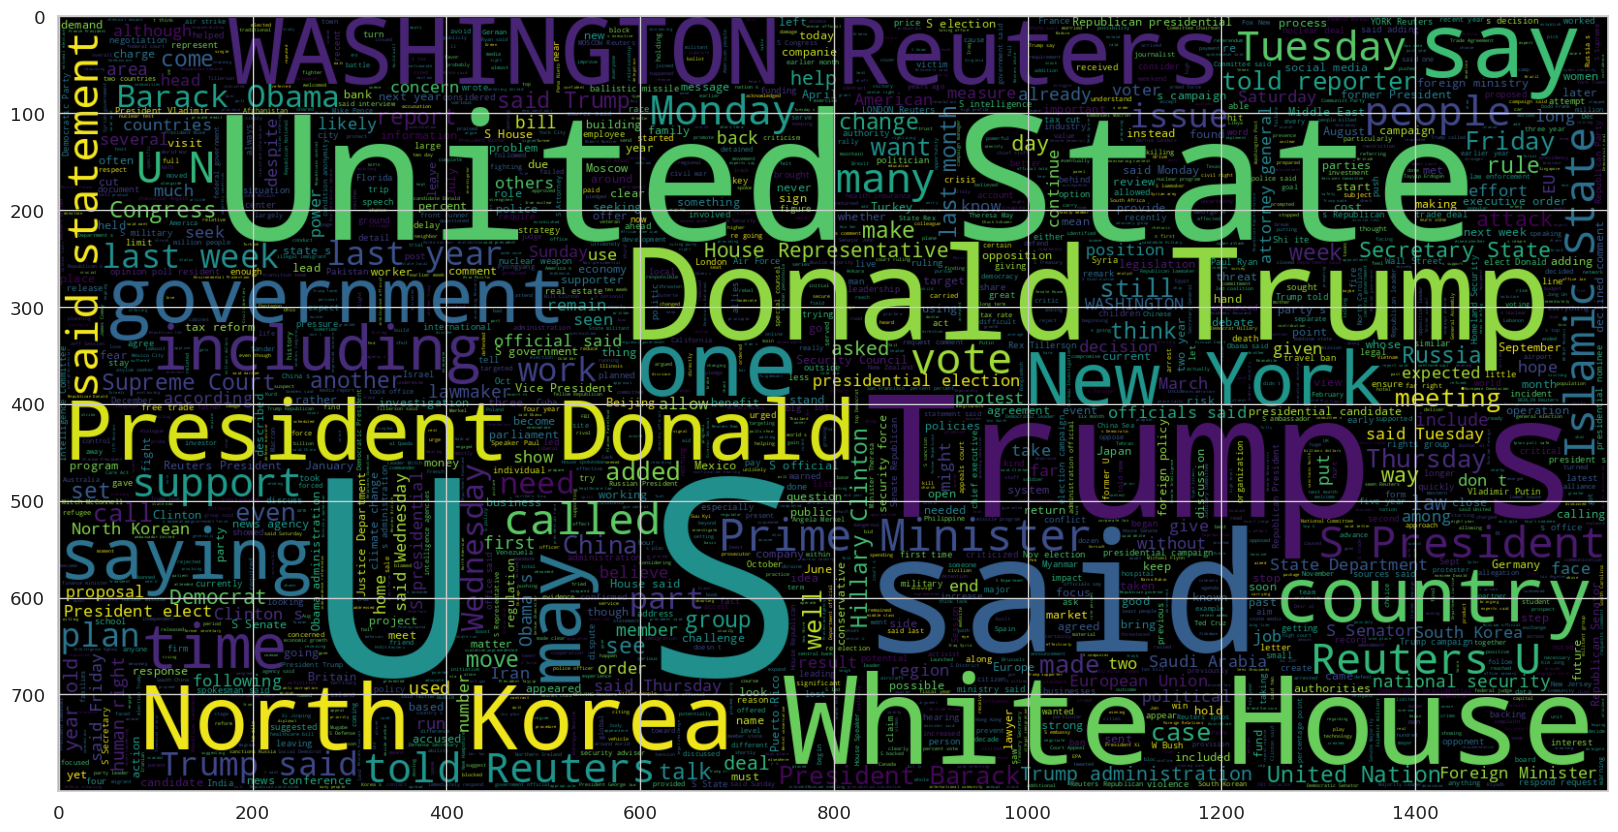

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc, interpolation = 'bilinear')

wordclouds for fake text (label - 0)

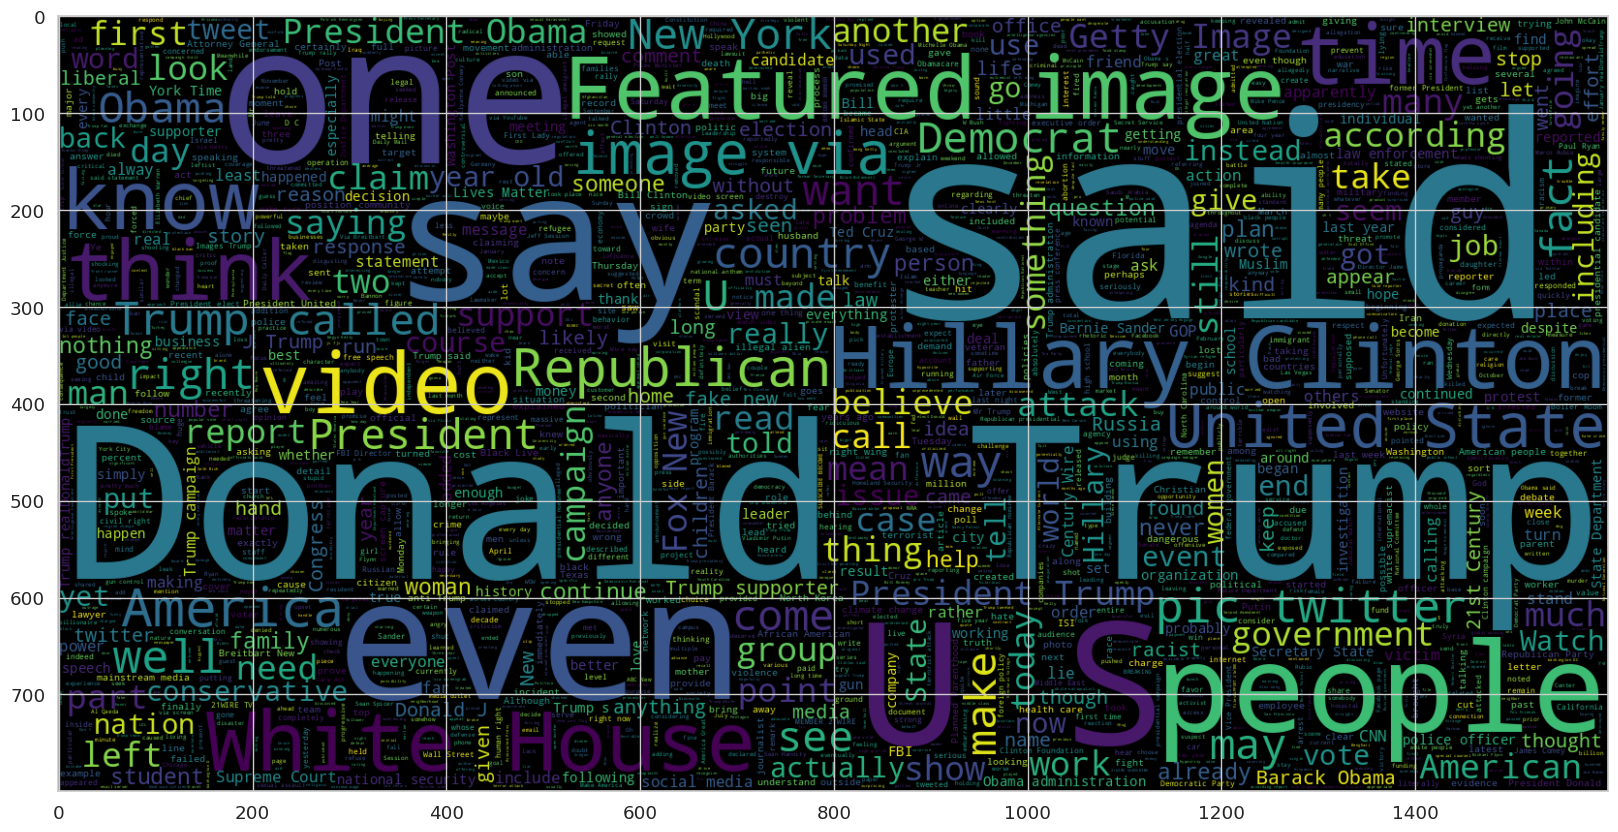

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc, interpolation = 'bilinear')

number of characters in text

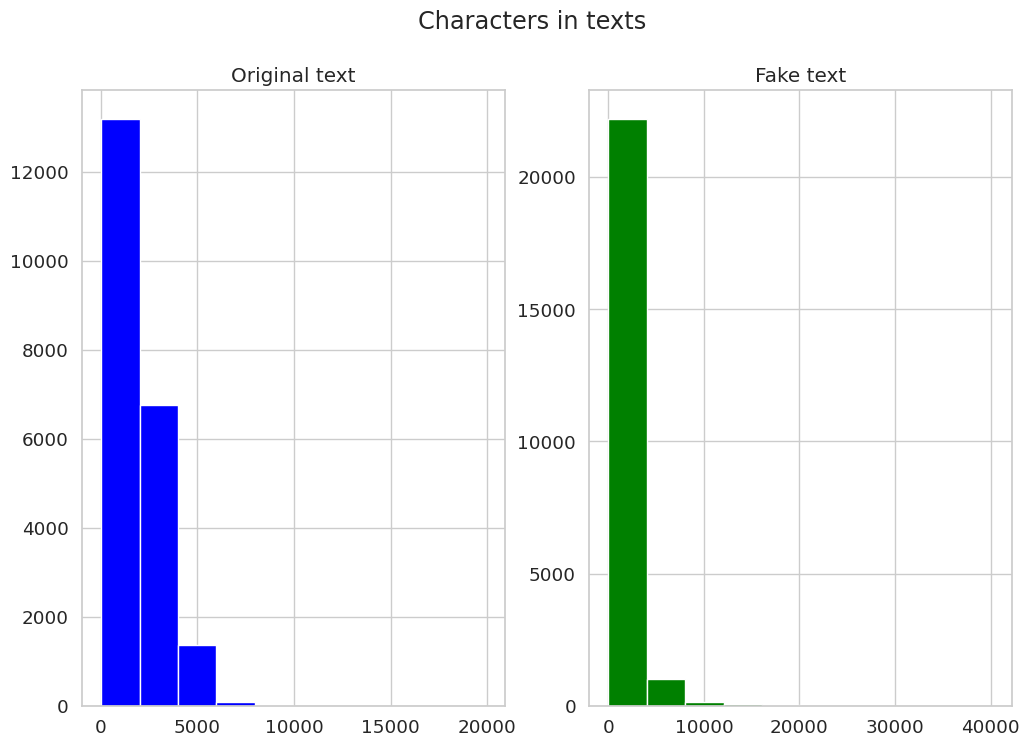

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
text_len = df[df['category'] == 1]['text'].str.len()
ax1.hist(text_len, color = 'blue')
ax1.set_title('Original text')

text_len = df[df['category'] == 0]['text'].str.len()
ax2.hist(text_len, color = 'green')
ax2.set_title('Fake text')

fig.suptitle('Characters in texts')
plt.show()

The distribution of both seems to be a bit different. 2500 characters in text is the mose common in original text category while aroundd 5000 characters in text are mosr common in fake text category.

number of words in each text

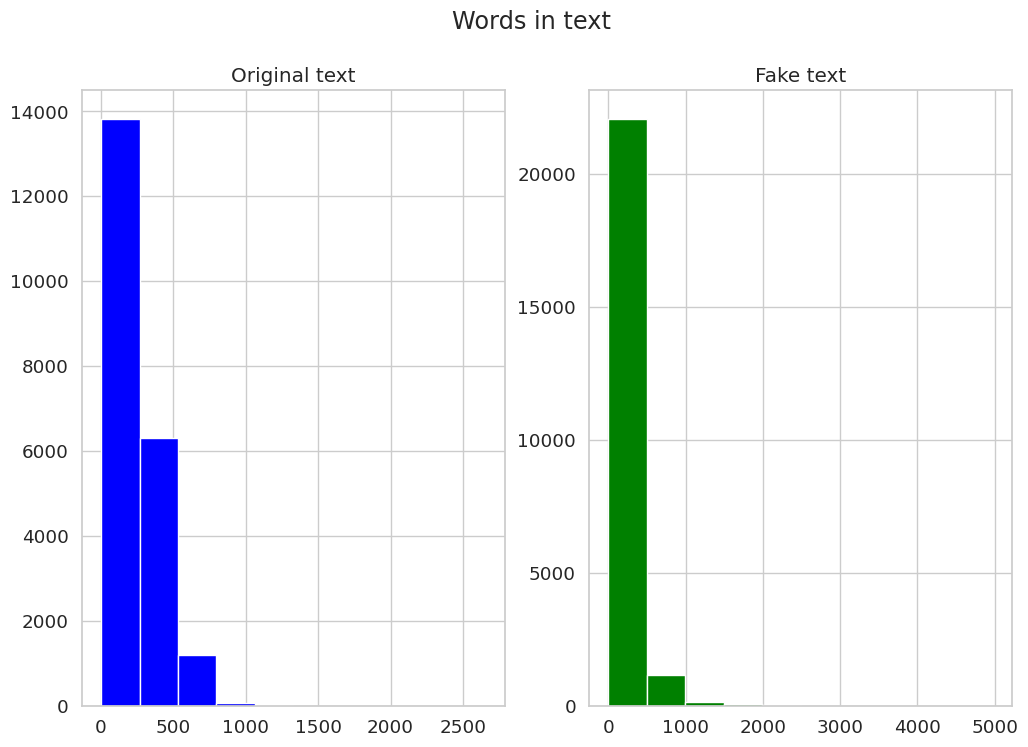

In [ ]:
fig, (ax1 ,ax2) = plt.subplots(1, 2, figsize=(12,8))
text_len = df[df['category'] == 1]['text'].str.split().map(lambda x:len(x))
ax1.hist(text_len, color = 'blue')
ax1.set_title('Original text')

text_len = df[df['category'] == 0]['text'].str.split().map(lambda x:len(x))
ax2.hist(text_len, color = 'green')
ax2.set_title('Fake text')

fig.suptitle('Words in text')
plt.show()

average word length in a text

<ipython-input-21-6c85deff1907>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x : np.mean(x)), ax = ax1, color = 'blue')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-21-6c85deff1907>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure

Text(0.5, 0.98, 'Average word length in each text')

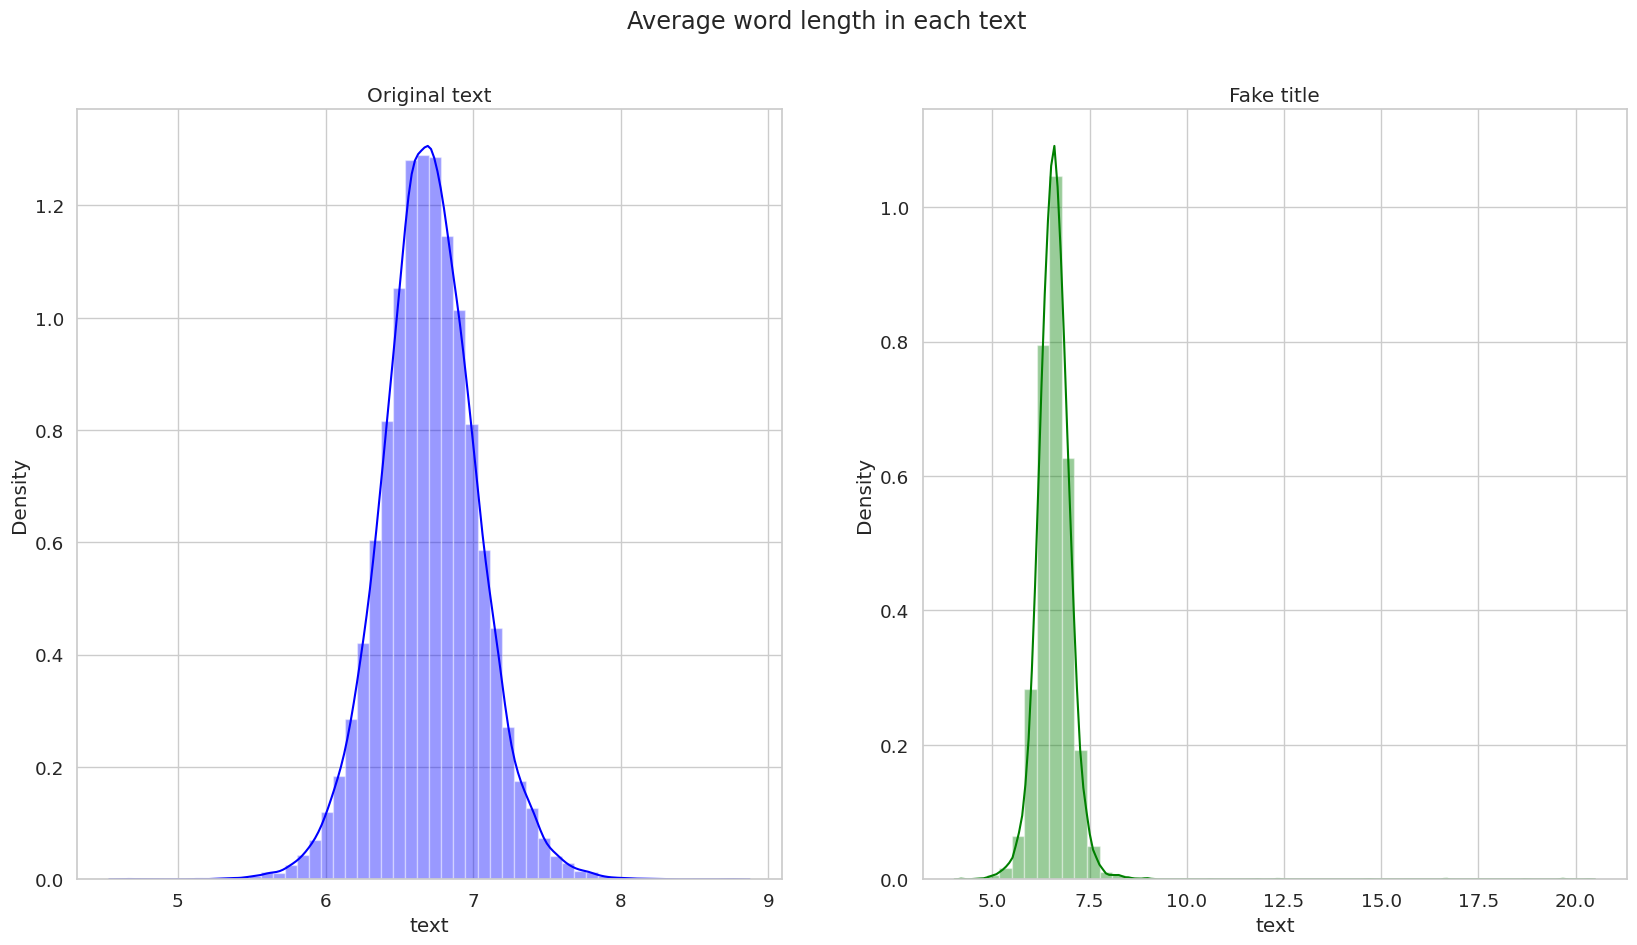

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
word = df[df['category'] == 1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x : np.mean(x)), ax = ax1, color = 'blue')
ax1.set_title('Original text')

word = df[df['category'] == 0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x : np.mean(x)), ax = ax2, color = 'green')
ax2.set_title('Fake title')

fig.suptitle('Average word length in each text')

In [ ]:
def get_corpus(text):
  words = []
  for i in text:
    for j in i.split():
      words.append(j.strip())

  return words
corpus = get_corpus(df.text)
corpus[:5]

['WASHINGTON', '(Reuters)', 'head', 'conservative', 'Republican']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Trump': 111503,
 'said': 93162,
 'would': 54613,
 'U.S.': 50441,
 'President': 33180,
 'people': 33115,
 'also': 30325,
 'one': 29370,
 'Donald': 27795,
 'said.': 26194}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
  vec = CountVectorizer(ngram_range = (g,g)).fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
  return words_freq[:n]

unigram Analysis

<Axes: >

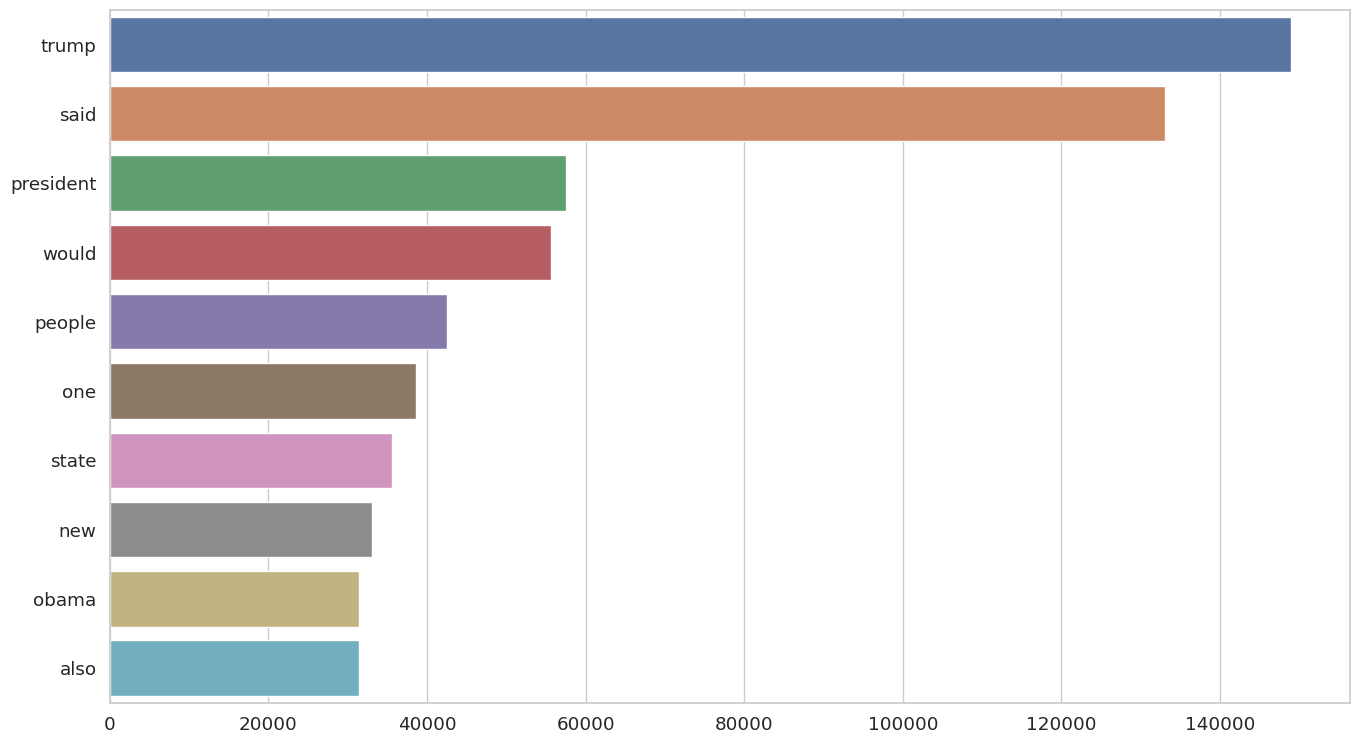

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text, 10, 1)
most_common_uni = dict(most_common_uni)
sns.barplot(x = list(most_common_uni.values()), y=list(most_common_uni.keys()))

Bigram Analysis

<Axes: >

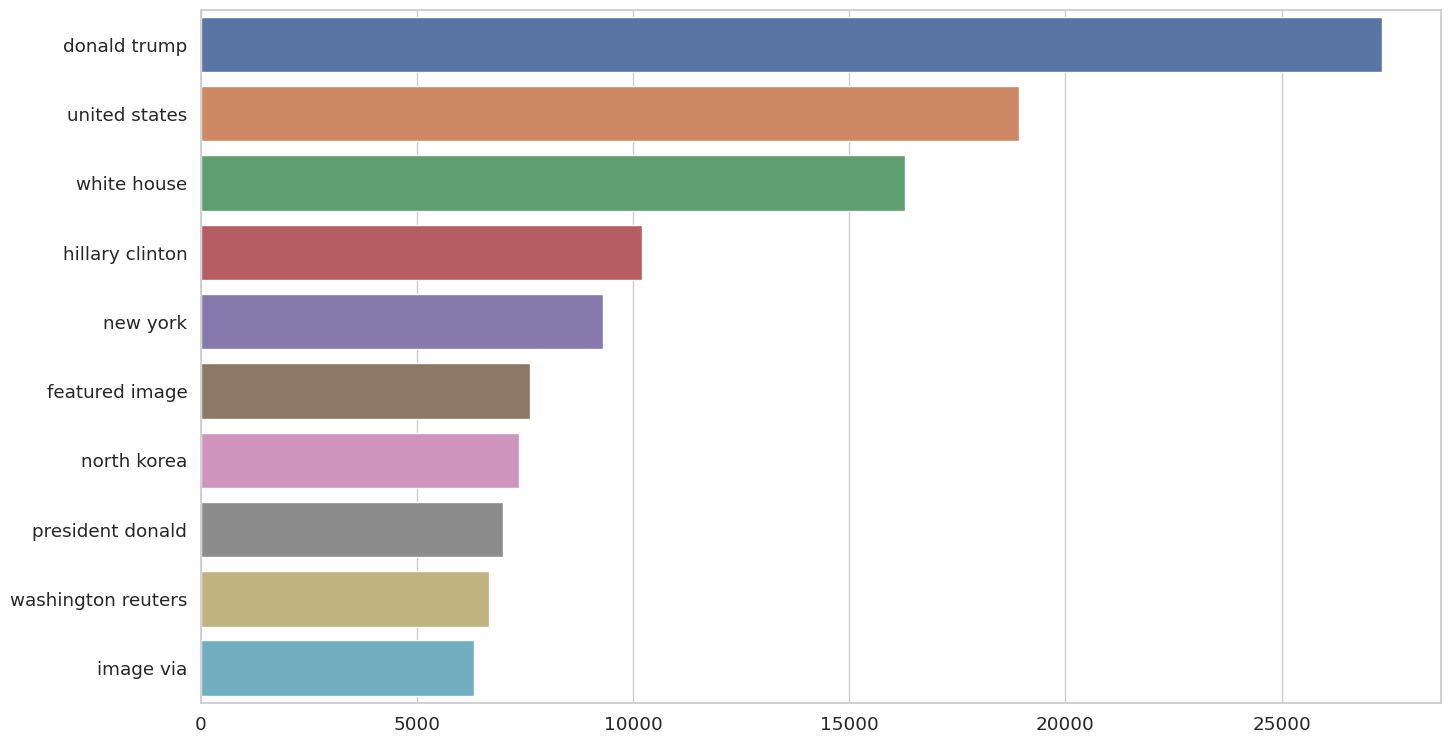

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.text, 10, 2)
most_common_bi = dict(most_common_bi)
sns.barplot(x = list(most_common_bi.values()), y=list(most_common_bi.keys()))

Trigram Analysis

<Axes: >

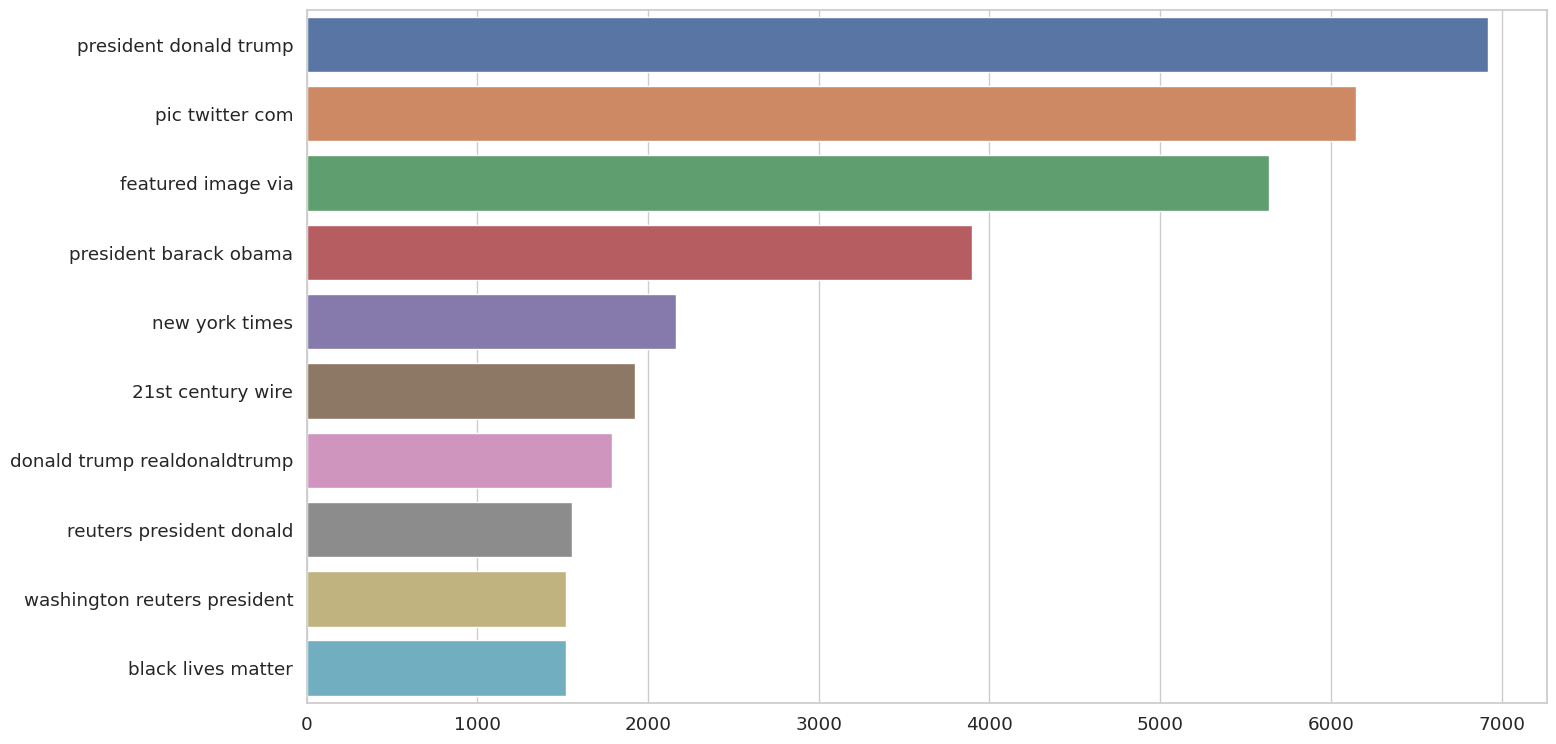

In [ ]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df.text, 10, 3)
most_common_tri = dict(most_common_tri)
sns.barplot(x = list(most_common_tri.values()), y=list(most_common_tri.keys()))

Splitting the data into 2 parts - training and testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.category, random_state = 0)

In [ ]:
max_features = 10000
maxlen = 300

Tokenizing Text => Repsesenting each word by a number <lr>
Mapping of original word to number is preserved in word_index property of tokenizer <lr>
Tokenized applies basic processing like changing it to lower case, explicitely setting that as False <lr>
Lets keep all news to 300, add padding to news with less than 300 words and truncating long ones

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from keras.utils.data_utils import pad_sequences

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = pad_sequences(tokenized_test, maxlen=maxlen)

# Introduction to GloVe
**GloVe method is built on an important idea,
You can derive semantic relationships between words from the co-occurrence matrix.
Given a corpus having V words, the co-occurrence matrix X will be a V x V matrix, where the i th row and j th column of X, X_ij denotes how many times word i has co-occurred with word j. An example co-occurrence matrix might look as follows.**
![Glove.png]
**The co-occurrence matrix for the sentence “the cat sat on the mat” with a window size of 1. As you probably noticed it is a symmetric matrix.
How do we get a metric that measures semantic similarity between words from this? For that, you will need three words at a time. Let me concretely lay down this statement.**

**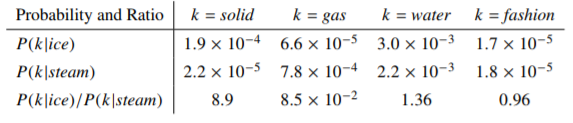
The behavior of P_ik/P_jk for various words
Consider the entity
P_ik/P_jk where P_ik = X_ik/X_i
Here P_ik denotes the probability of seeing word i and k together, which is computed by dividing the number of times i and k appeared together (X_ik) by the total number of times word i appeared in the corpus (X_i).
You can see that given two words, i.e. ice and steam, if the third word k (also called the “probe word”),
is very similar to ice but irrelevant to steam (e.g. k=solid), P_ik/P_jk will be very high (>1),
is very similar to steam but irrelevant to ice (e.g. k=gas), P_ik/P_jk will be very small (<1),
is related or unrelated to either words, then P_ik/P_jk will be close to 1
So, if we can find a way to incorporate P_ik/P_jk to computing word vectors we will be achieving the goal of using global statistics when learning word vectors.**

**Source Credits - https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010**

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parkhannah833","key":"78bf44606c362ad274d8621ef9b609e9"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions list

ref                                                                                           deadline             category             reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection                          2023-06-14 23:59:00  Featured         $1,000,000        908           False  
https://www.kaggle.com/competitions/asl-fingerspelling                                        2023-08-10 23:59:00  Research           $200,000          0           False  
https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction                 2023-06-08 23:59:00  Research           $100,000        946           False  
https://www.kaggle.com/competitions/2023-kaggle-ai-report                                     2023-07-05 23:59:00  Analytics           $70,0

In [ ]:
! kaggle datasets download -d icw123/glove-twitter

100% 1.45G/1.45G [00:17<00:00, 122MB/s]
100% 1.45G/1.45G [00:17<00:00, 91.2MB/s]


In [ ]:
!ls

 drive	 glove-twitter.zip  'kaggle (1).json'   kaggle.json   sample_data


In [ ]:
!unzip glove-twitter.zip

Archive:  glove-twitter.zip
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  


In [ ]:
EMBEDDING_FILE = '/content/glove.twitter.27B.100d.txt'

In [ ]:
def get_coefs(word, *arr):
  return word, np.asarray(arr, dtype='float32')

embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean, emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))

# change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

for word, i in word_index.items():
  if i >= max_features: continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


Some model parameters

In [ ]:
batch_size = 256
epochs = 10
embed_size = 100

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, factor=0.5, min_lr = 0.00001)

Training the model

In [ ]:
# defining neural network
model = Sequential()
# Non trainable embedding layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
# LSTM
model.add(LSTM(units=128, return_sequences = True, recurrent_dropout = 0.25, dropout=0.25))
model.add(LSTM(units = 64, recurrent_dropout = 0.1, dropout = 0.1))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = keras.optimizers.Adam(lr= 0.01), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          1000000   
                                                                 
 lstm_2 (LSTM)               (None, 300, 128)          117248    
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
histor = model.fit(x_train, y_train, batch_size = batch_size, validation_data = (X_test, y_test), epochs = epochs, callbacks = [learning_rate_reduction])

Epoch 1/10
132/132 [==============================] - 382s 3s/step - loss: 0.1467 - accuracy: 0.9388 - val_loss: 0.0686 - val_accuracy: 0.9773 - lr: 0.0100
Epoch 2/10
132/132 [==============================] - 362s 3s/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.0136 - val_accuracy: 0.9960 - lr: 0.0100
Epoch 3/10
132/132 [==============================] - 497s 4s/step - loss: 0.0424 - accuracy: 0.9860 - val_loss: 0.0260 - val_accuracy: 0.9891 - lr: 0.0100
Epoch 4/10
132/132 [==============================] - 364s 3s/step - loss: 0.0163 - accuracy: 0.9943 - val_loss: 0.0098 - val_accuracy: 0.9965 - lr: 0.0100
Epoch 5/10
132/132 [==============================] - 472s 4s/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0066 - val_accuracy: 0.9982 - lr: 0.0100
Epoch 6/10
132/132 [==============================] - 367s 3s/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0049 - val_accuracy: 0.9986 - lr: 0.0100
Epoch 7/10
132/132 [==============================] - 364s 3s/st

Analysis after training of model

In [ ]:
print('Accuracy of the model on Training Data is - ', model.evaluate(x_train, y_train)[1]*100, '%')
print('Accuracy of the model on Testing Data is - ', model.evaluate(X_test, y_test)[1]*100, '%')

1053/1053 [==============================] - 186s 176ms/step - loss: 5.9421e-04 - accuracy: 0.9999
Accuracy of the model on Training Data is -  99.98515248298645 %
351/351 [==============================] - 62s 176ms/step - loss: 0.0072 - accuracy: 0.9980
Accuracy of the model on Testing Data is -  99.79510307312012 %


Text(0, 0.5, 'Loss')

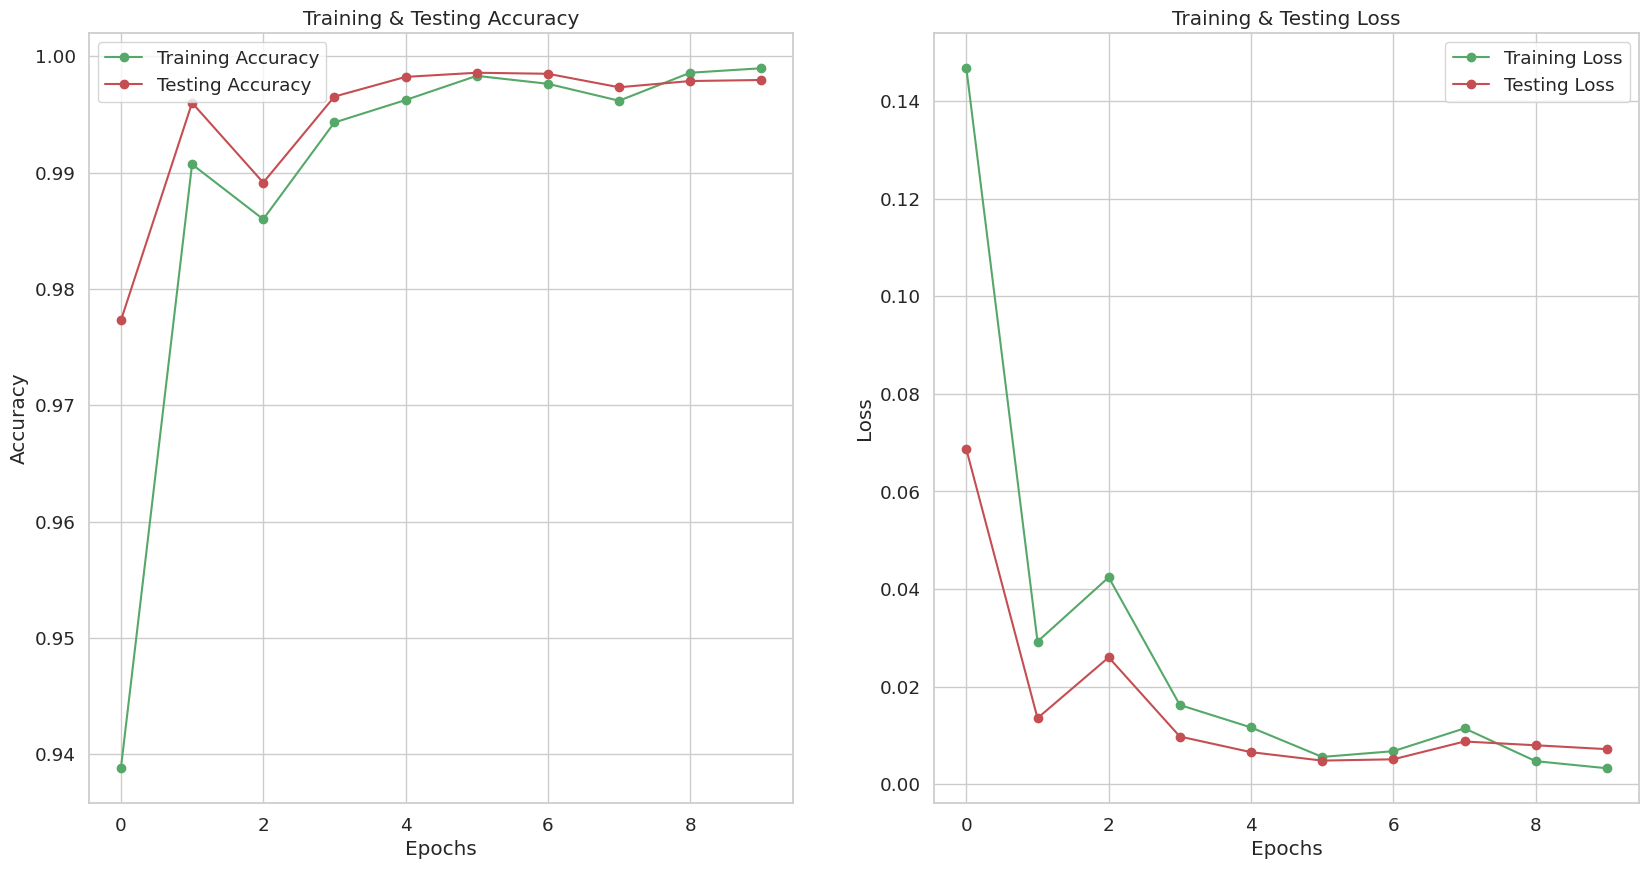

In [ ]:
epochs = [i for i in range(10)]
fig, ax = plt.subplots(1,2)
train_acc = histor.history['accuracy']
train_loss = histor.history['loss']

val_acc = histor.history['val_accuracy']
val_loss = histor.history['val_loss']

fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss, 'go-', label = 'Training Loss')
ax[1].plot(epochs, val_loss, 'ro-', label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

# predicted_classes 오류
1. softmax 을 사용하는 multi class classification인 경우 <lr>
  np.argmax(model.predict(x), axis=-1)<hr>

2. sigmoid을 사용하는 binary classification인 경우.  <lr>
  (model.predict(X_test) > 0.5).astype("int32")

In [ ]:
predicted = (model.predict(X_test) > 0.5).astype("int32")

351/351 [==============================] - 81s 231ms/step


In [ ]:
print(classification_report(y_test, predicted, target_names = ['Fake', 'Not Fake']))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      5858
    Not Fake       1.00      1.00      1.00      5367

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [ ]:
cm = confusion_matrix(y_test, predicted)
cm

array([[5853,    5],
       [  18, 5349]])

In [ ]:
cm = pd.DataFrame(cm, index = ['Fake', 'Original'], columns = ['Fake', 'Original'])

Text(88.25, 0.5, 'Actual')

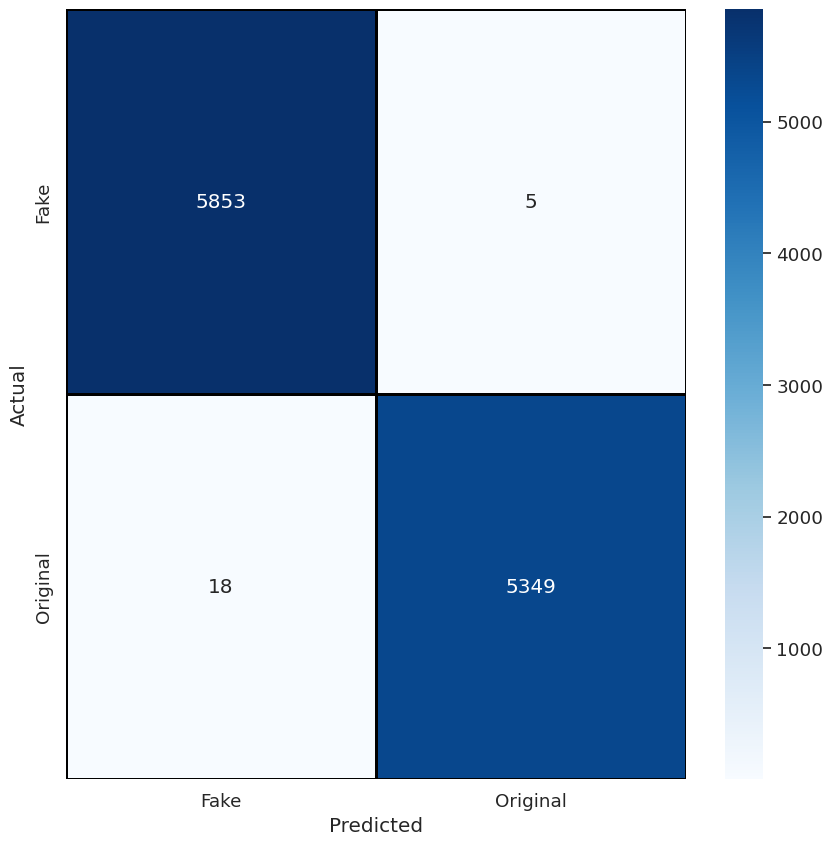

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm, cmap='Blues', linecolor = 'black', linewidth = 1, annot=True, fmt='', xticklabels = ['Fake', 'Original'], yticklabels = ['Fake', 'Original'])
plt.xlabel('Predicted')
plt.ylabel('Actual')